# Project Python Foundations: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [101]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Read the data
df = pd.read_csv('foodhub_order.csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Observations:
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [64]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(1898, 11)

Observations: We have 1898 rows and 9 columns in the data. The rows account for all the orders processed

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations: We have 1 float data type, 4 integers and 4 objects. The Rating column has the wrong data type. Order ID, and Customer ID are also categorical variables with numerical labels. We may want to amend them accordingly

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [8]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Observations: We do not have any null values in the data frame, hence it requires no treatment, however we note that we did not have reviews for all the orders, for which we replaced the 'Not given' with 0

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [73]:
# Get the summary statistics of the numerical data
df.describe().T ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.250,1477495.500,1.477970e+06,1.478444e+06
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.750,128600.000,2.705250e+05,4.053340e+05
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.080,14.140,2.229750e+01,3.541000e+01
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.000,27.000,3.100000e+01,3.500000e+01
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.000,25.000,2.800000e+01,3.300000e+01
Revenue,1898.0,3.248842e+00,2.295598,0.00,1.812,2.121,5.574375e+00,8.852500e+00
total_time,1898.0,5.153372e+01,6.833603,35.00,47.000,52.000,5.600000e+01,6.800000e+01


Observations:
We have 1898 observations, 25% of the observations cost 12.08 or below, have no rating (rating zero as per the amendment done above), take about 23 minutes or below to prepare, and 20 minutes or below to deliver, 50% have values below 14.14, 4,27, and 25 for the cost, rating, preparation time, & delivery time respectively, for the 75% we have values below 22.29,5, 31, & 28 with the max observations being 35.41, 5, 35 and 33 for the same parameters.

Of these it takes a minimum of 20 minutes, an average of 27.37 minutes and a maximum of 35 minutes to prepare the food once the order is placed

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
df['rating'].value_counts() ## Complete the code 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

Observations: Having converted the rating 'Not Given' value to zero, the count of zeros represent the same hence 736 orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [11]:
# check unique order ID
df['order_id'].nunique()  

1898

#### Customer ID

In [12]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [13]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [14]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

In [59]:
large_to_small = df.groupby('cuisine_type').size().sort_values().index[::-1]

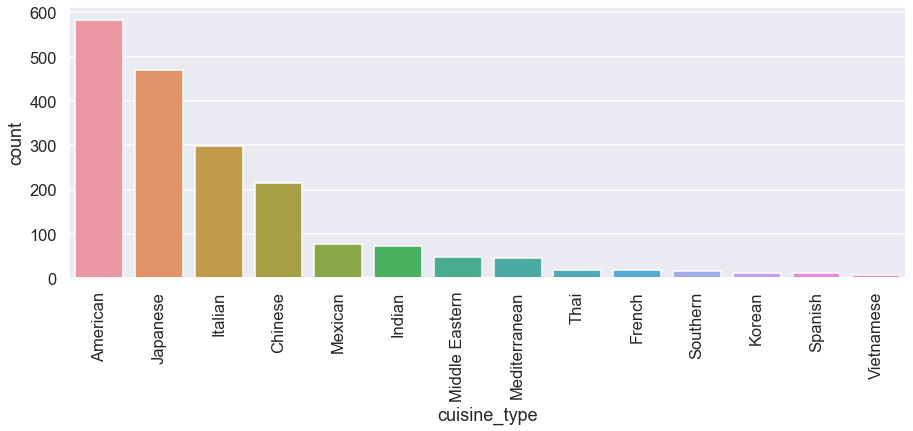

In [109]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type', order=large_to_small); ## Create a countplot for cuisine type.
plt.xticks(rotation=90);

#### Cost of the order

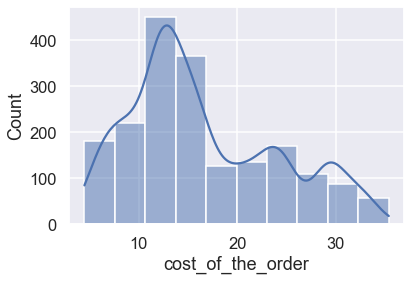

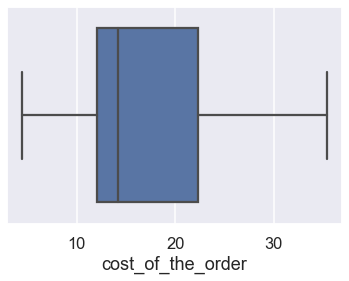

In [105]:
sns.histplot(data=df, x='cost_of_the_order',bins = 10, stat = 'count',kde=True) ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df, x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

The histplot is skewed to the left, that is,more towards lower costs, however we note that there is a slight peak at around 25 dollars. The boxplot indicates that the median cost is about 14 dollars, with the orders being right skewed. This implies a a bigger spread above the median. Given that we have two main target markets students and working professionals, it would be good to note if they are the cause of the two peaks with the probability of the well-off professionals being on the right peak and students concentrating on the main and left peak.

#### Day of the week

In [17]:
# # Check the unique values
df['day_of_the_week'].unique() ## Complete the code to check unique values for the 'day_of_the_week' column

array(['Weekend', 'Weekday'], dtype=object)

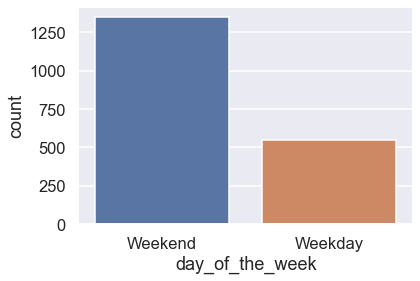

In [89]:
sns.countplot(data = df, x = 'day_of_the_week'); ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [19]:
# Check the unique values
df['rating'].unique() ## Complete the code to check unique values for the 'rating' column

array(['Not given', '5', '3', '4'], dtype=object)

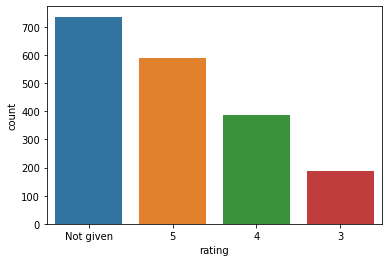

In [62]:
sns.countplot(data = df, x = 'rating', 
              order=['Not given', '5', '4', '3']); ## Complete the code to plot bar graph for 'rating' column

* The above demonstrates that more than 700 customers have not rated their experience. Out of the customers who did, most rated 5 stars for their experience

#### Food Preparation time

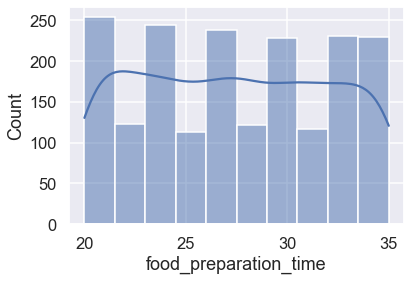

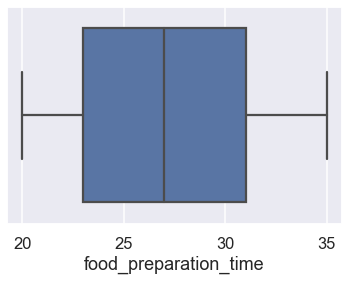

In [106]:
sns.histplot(data=df,x='food_preparation_time', bins = 10,stat = 'count',kde = True) ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()

Observation on Food preparation time:
There is a fairly even distribution of the time it takes to prepare the dish between 20 minutes and 36 minutes with a median of about 27 minutes

#### Delivery time

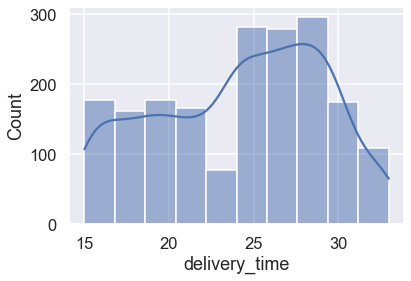

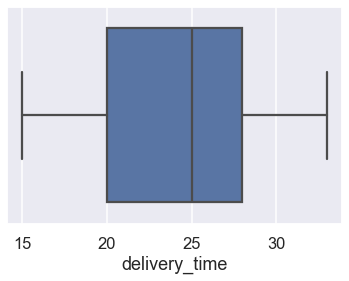

In [107]:
sns.histplot(data=df,x='delivery_time', bins = 10,stat = 'count',kde = True) ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

Observations on Delivery Time:
The median delivery time is about 25 minutes with the observations being skewed to the left. From the histplot we can determine that most orders take between 25 and 28 minutes to be delivered.

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts() ## Complete the code

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sarabeth's West                1
Kori Restaurant and Bar        1
Lucky Strike                   1
Posto                          1
Chote Nawab                    1
Name: restaurant_name, Length: 178, dtype: int64

Observations: Shake Shack is the leading restaurant with 219 orders, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken & Parm have 132, 119, 96 & 68 orders respectively and together make up the top 5 restaurants in terms of orders processed

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [24]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].mode() ## Complete the code to check unique values for the cuisine type on weekend

0    American
dtype: object

In [75]:
df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
cuisine_type,,,,,,,,,,
American,415,415,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53,53,53


Observations:
American Cuisine Type is the most popular during the weekends with a count of 415 orders

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [25]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [26]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [47]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(5)  ## Write the appropriate column name to get the top 5 cmost frequent customers

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

Observations:
Having extracted the top 10 most frequent customers, it reveals that there is a tie of four clients with the 5th highest order count. The company may have to use the total amount spent by these customers ,or some other parameter, to be a tie-breaker or make a decision on how to address the multiple customers with the same qualifying score.Otherwise they should provision to reward 8 customers instead of 5.

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

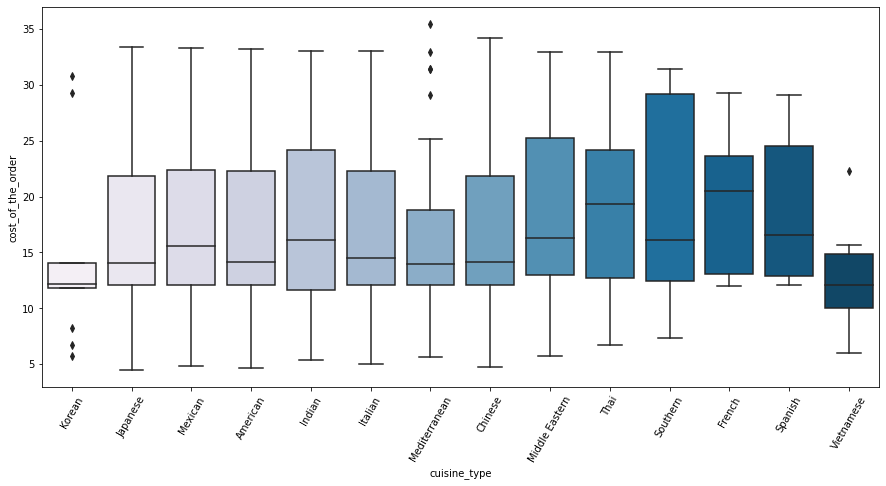

In [28]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

* The above figure indicates that French cuisine may be more expensive than others whereas Vietnamese cuisine is the least expensive

#### Cuisine vs Food Preparation time

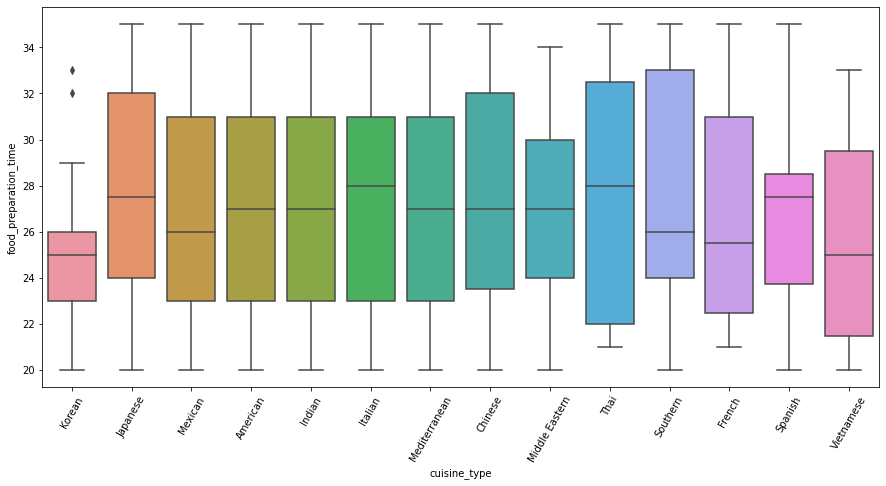

<function matplotlib.pyplot.show(close=None, block=None)>

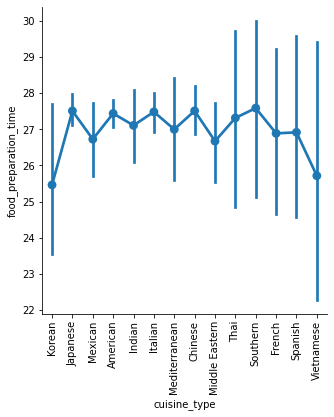

In [71]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point'),
plt.xticks(rotation=90)
plt.show

Most cuisine types have more or less the same average preparation time although some have a larger spread of the 95% confidence interval.

Observations on Spread Cost of Order:
Most cuisines have varying degrees of skewed costs with afew having outliers such as Korean, Mediterranean and Vietnamese

#### Day of the Week vs Delivery time

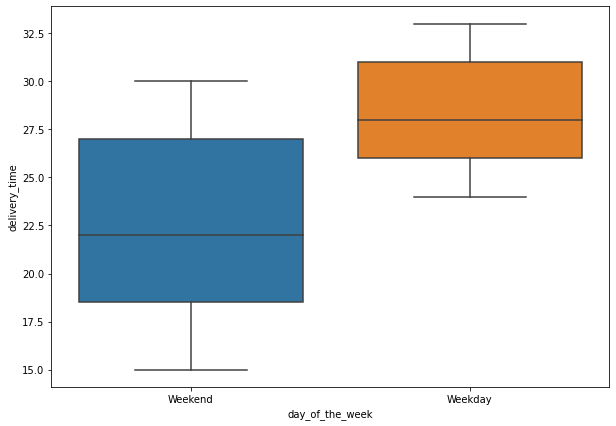

In [30]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(10,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df)  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

Observations on Day of the week against the other variables: We note a steady spread of observations irrespective of the day of the week, except for delivery time which generally takes longer during the weekdays than during the weekends. The median delivery time for weekends is around 22.5 minutes while that of the weekdays is about 28.5 minutes

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [31]:
revenue_gntd = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)
print(revenue_gntd)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64


#### Rating vs Delivery time

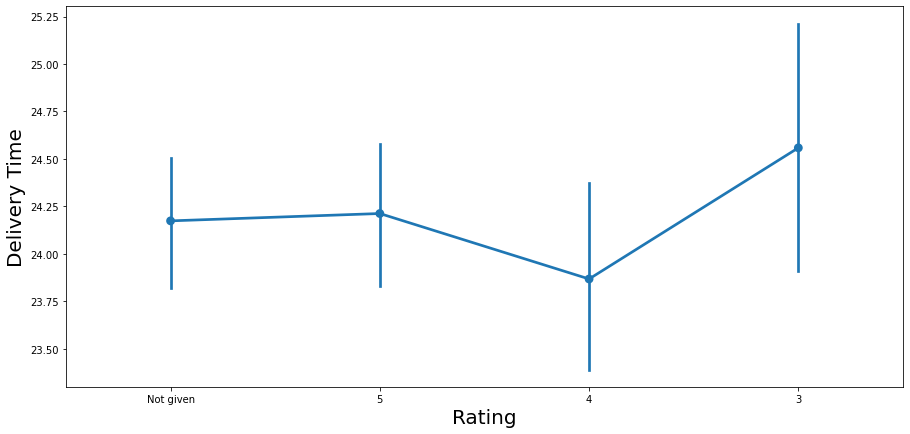

In [63]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', 
              order=['Not given', '5', '4', '3'], data = df)
plt.xlabel('Rating', fontsize = 20)
plt.ylabel('Delivery Time', fontsize = 20)
plt.show()

* 3 star rated restaurants take longest to deliver food
* 5 star restaurants are also the most expensive.

#### Rating vs Food preparation time

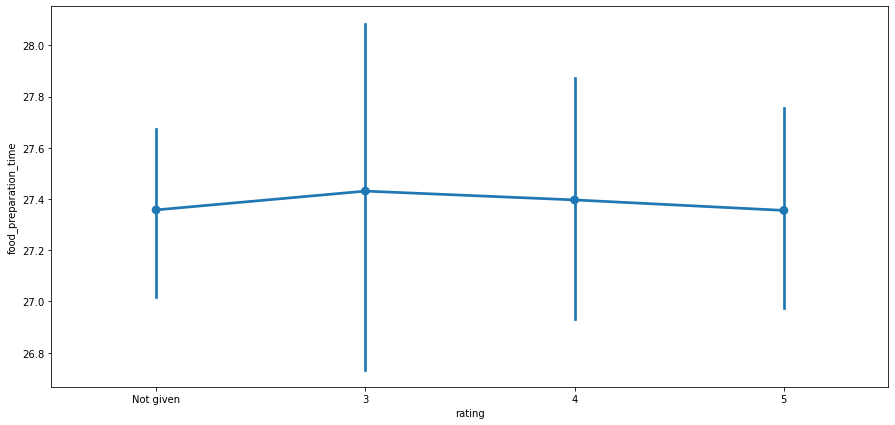

In [33]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', 
              order=['Not given', '3', '4', '5'], data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

* Food preparation time has no impact on rating.

#### Rating vs Cost of the order

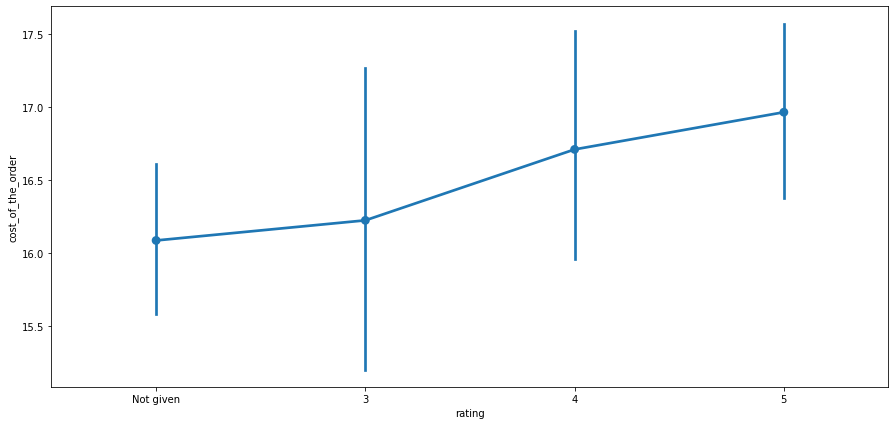

In [34]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', 
              order=['Not given', '3', '4', '5'], data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

* From the above figures we can see that the delivery time is higher for 3 star rated orders and cost of order is comparatively low. So, by decreasing the delivery time it will be easier to increase the orders as the price is also low for those orders.

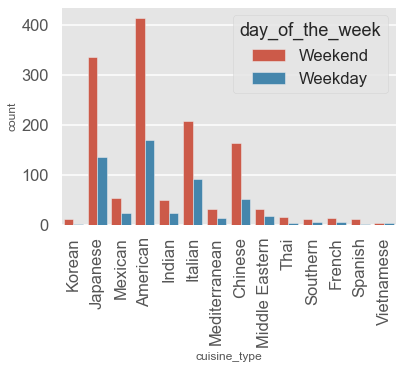

In [97]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    ax=sns.countplot(data=df,x='cuisine_type', hue= 'day_of_the_week')
    plt.xticks(rotation=90)
    plt.savefig('cuisine_type_vs_day_of_the_week.png', dpi=300, bbox_inches='tight')

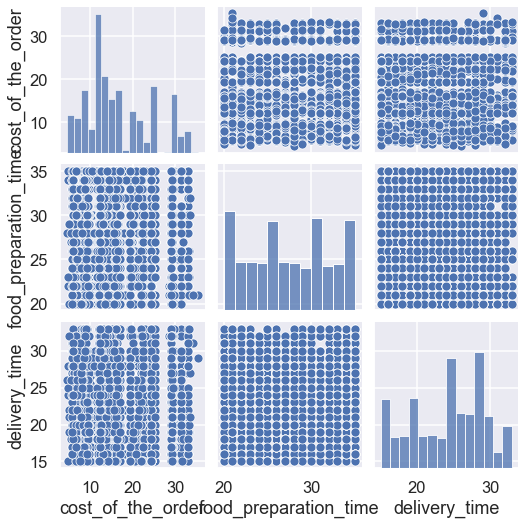

In [93]:
sns.pairplot(data = df.loc[:, ('cost_of_the_order', 'food_preparation_time', 'delivery_time')])
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')

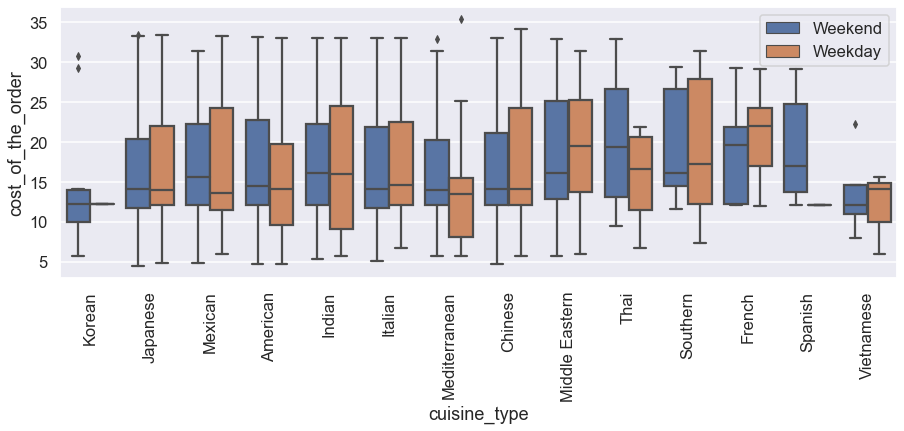

In [131]:
fig,ax=plt.subplots(figsize=(15,5))
sns.boxplot(x='cuisine_type', y='cost_of_the_order' , hue='day_of_the_week', data=df, ax=ax)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.savefig('multivariateplot.png', dpi=300, bbox_inches='tight')

*The cost of Spanish cuisine appears to be higher during weekends

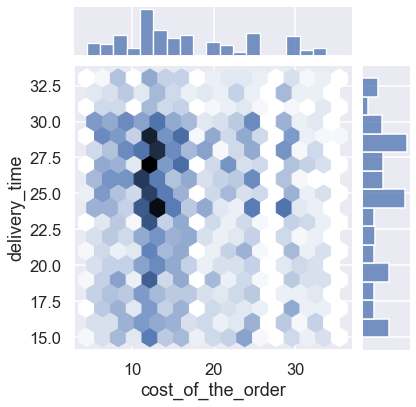

In [119]:
sns.jointplot(data = df, x = 'cost_of_the_order', y = 'delivery_time', kind = 'hex')
plt.savefig('jointplot_dt_coto.png', dpi=300, bbox_inches='tight')

* Order costs are densely populated at about 11 USD within a range of about 24 - 30 minutes delivery time

#### Correlation among variables

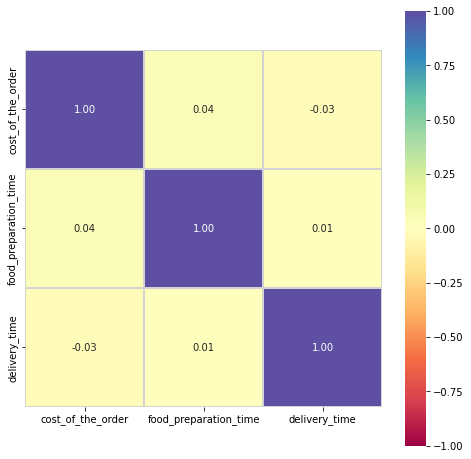

In [39]:
# Plot the heatmap

#corr = df[col_list].corr()

#mask = np.triu(np.ones_like(corr, dtype=bool))

col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(8, 8))
sns.heatmap(df[col_list].corr(), square=True, annot=True, vmin=-1, vmax=1, fmt=".2f", linewidth=0.5, linecolor='lightgray', cmap="Spectral")
plt.show()

Observations on the Heatmap and pairplot:
The heatmap shows very weak correlation between the variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [40]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


Observations: Four Restaurants namely Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop qualify for the promotional offer. 

In [41]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


* Revenue generated by the restaurants is in the same order as restaurants with highest number of orders received. The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars so the net revenue generated by the company across all orders is around 6166.3 dollars

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [42]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [43]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


Observations:
Given the market differentiation in price, FoodHub collected a total of $ 6163.39 for the orders given

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [44]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

percentage = (df['total_time']> 60) * 100

print("Percentage of orders that have more than 60 minutes of total delivery time:", round(percentage, 2), '%')



Percentage of orders that have more than 60 minutes of total delivery time: 0       0
1       0
2       0
3       0
4       0
       ..
1893    0
1894    0
1895    0
1896    0
1897    0
Name: total_time, Length: 1898, dtype: int32 %


Observations:
About 10.54% of orders take more than 60 minutes to prepare and deliver.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [45]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')




The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


Observations:
The mean delivery time during the weekend is 22.47 minutes against the weekday delivery time of 28.34. This is a curious observation especially reviewed against the count, which implies there are fewer orders over the weekdays compared to weekends. Probable explanation would be, there is higher traffic on weekdays than weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* With rating concentrated around the high score of 5, its possible that mostly its the very satisfied customers that bother to rate the service. However alot of data about (38%) is lost in the unrated orders. A curious question that would arise is whether the unrated orders would skew the rating in a different direction
* Whereas the cost of orders peak at around 13 dollars, there is a slight peak around 25 dollars as well making the observations bimodal
* There is a consistent popularity structure of the cuisines irrespective of the day of the week although demand is significantly higher over the weekends.
* Preparation time is relatively consistent as compared to delivery time, meaning delivery time is the significant variable in total preparation time (total time between order and delivery to customer).
* There is a tie of 4 customers on the the 5th position given the reward criteria proposed. It requires further analysis or decision on how to handle such.

### Recommendations:

* FoodHub can consider increasing number of top-rated restaurants that offers the top-rated cuisine type that is American, Japanese, Italian, Chinese, Indian etc. to increasing the number of orders on FoodHub.

* Also, we observed that most of the orders placed were costing between 10 to 20 dollars, so to include restaurants in which average price of ranges between the above figures to increase more orders.

* Improve the customers' response rating their orders, that is, reduce the rating 'Not given' on the orders. If possible, entice them with a reward or follow up to know why they opt not to rate the service. This is so that better data can be available to determine customer satisfaction and enable service improvements

* On promotional offers the organization will have to consider a tie-breaker for cases where customers have the same score.

* Given the consistent popularity of the cuisines across the days of the week, better marketing can be focused on the weekday to boost sales.

* To improve on total order time (the total time taken between the customer placing the order and receiving their delivery) a review on how to bring down delivery time can be assessed to improve on overall service.

* Judging by the number of orders, it appears that American style cuisine is the most popular among the customers, followed by Japanese, Italian, and Chinese. Therefore, my recommendation would be to increase the number of these restaurants in their portfolio.

* Also, I observed that most of the orders placed were costing between 10 to 20 dollars, so, including restaurants in which average price is in the above range may lead to an increased number of orders

* Through rating (feedback) we get our performance review from the customers about the food quality, quantity, taste etc. and the total time of delivery, behavior of our staff. From this data we can see that above 700 customers have not given any rating, and we should make sure that we get more and more customer ratings.

* Generally, we relax or wind our incomplete personal work on weekends and thus more order received on weekends than weekdays. Increasing employees on weekends is a good idea to do cost effective business.

---